# TM10007 Assignment
Made by: Sifra Kuiper, Imme Spiekerman, Florien Algera and Nico Frijns

**Explanation of what this code will achieve**

This part of the code will connect this document to the github-location where the data is stored.

In [1]:
# Run this to use from colab environment
!pip install -q --upgrade git+https://github.com/NFAFrijns/TM10007_G1_lipo.git
!pip install fast_ml --upgrade

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 744.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 3

## import packages

In [63]:
# Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif
from statsmodels.sandbox.stats.multicomp import multipletests


## Pre-processing

## Data loading

Loading the data And extracting basic data. And splitting data in label and features.

In [49]:
# Data loading functions. Uncomment the one you want to use
from worclipo.load_data import load_data
data = load_data()

# Printing the demensions of the data
print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')

#splitting data into X and y
y  = data['label']
X = data[data.columns[1:]]
y = pd.DataFrame(y)
X = pd.DataFrame(X)
print(f'The number of samples: {len(X.index)}')
print(f'The number of samples: {len(y.index)}')
# Counting the different labels
def ratio_lipoma_liposarcoma(y):
  lipoma = 0
  liposarcoma = 0
  for i in y['label']:
    if i == "lipoma":
      lipoma += 1
    else:
      liposarcoma += 1
  return f'Ratio van lipoma and liposarcoma is: {lipoma} : {liposarcoma}'
print(ratio_lipoma_liposarcoma(y))




The number of samples: 115
The number of columns: 494
The number of samples: 115
The number of samples: 115
Ratio van lipoma and liposarcoma is: 57 : 58


## Splitting the data into training and test

We will split the data in a training en test set with the following ratio 4:1 (training:test) using a stratified split.



In [47]:
from sklearn.model_selection import train_test_split
# making the train and test data
X_selected_train, X_selected_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

print(f'Train {ratio_lipoma_liposarcoma(y_train)}')
print(f'Test {ratio_lipoma_liposarcoma(y_test)}')

Train Ratio van lipoma and liposarcoma is: 46 : 46
Test Ratio van lipoma and liposarcoma is: 11 : 12


## Checking for missing data


In [50]:
from fast_ml.missing_data_imputation import MissingDataImputer_Numerical
from fast_ml import eda
import numpy as np

summary_df = eda.df_info(X_selected_train)
 #display_all(summary_df)

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Replace zeros with NaNs
X_selected_train_nan = X_train.replace(0, np.nan)
X_selected_test_nan = X_test.replace(0, np.nan)

# Calculate the percentage of NaN values for each feature
nan_percentage_train = (X_selected_train_nan.isnull().sum() / len(X_selected_train_nan)) * 100

# Identify columns with more than 5% NaN values
columns_to_exclude_train = nan_percentage_train[nan_percentage_train > 5].index

# Exclude columns with more than 5% NaN values from the training set
X_selected_train_filtered = X_selected_train_nan.drop(columns=columns_to_exclude_train)

# Create an instance of SimpleImputer with strategy='median'
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the filtered training set
imputer.fit(X_selected_train_filtered)

# Impute missing values in the training set and convert to DataFrame
X_selected_train = pd.DataFrame(imputer.transform(X_selected_train_filtered), columns=X_selected_train_filtered.columns, index=X_selected_train_filtered.index)

# Apply the same filtering and imputation steps to the test set
X_selected_test_filtered = X_selected_test_nan.drop(columns=columns_to_exclude_train)
X_selected_test = pd.DataFrame(imputer.transform(X_selected_test_filtered), columns=X_selected_test_filtered.columns, index=X_selected_test_filtered.index)

print(f'The number of columns: {len(X_selected_train.columns)}')
print(f'The number of columns: {len(X_selected_test.columns)}')

The number of columns: 464
The number of columns: 464


## Checking for variance
Removing zero-variance features

In [51]:
from sklearn.feature_selection import VarianceThreshold

# Record the column names and data types
original_columns_train = X_selected_train.columns
original_dtypes_train = X_selected_train.dtypes
# Create an instance of VarianceThreshold
selector = VarianceThreshold()

# Fit the selector to your training data
selector.fit(X_selected_train)

# Get the indices of the features that are kept after feature selection
kept_features_indices = selector.get_support(indices=True)

# Get the names of the kept features
kept_features_names = X_selected_train.columns[kept_features_indices]

# Transform the training data and create a new DataFrame with the kept features
relevant_features_train = selector.transform(X_selected_train)
X_selected_train = pd.DataFrame(relevant_features_train,
                                columns=kept_features_names,
                                index=X_train.index)
# setting features back to orginale datatype
for column in X_selected_train.columns:
  if column in original_columns_train:
    X_selected_train[column] = X_selected_train[column].astype(
        original_dtypes_train[column])
# Print the original DataFrame, transformed DataFrame,
# and the number of zero-variance features
print(f'The number of columns: {len(X_selected_train.columns)}')

# Test data same transformation as train
original_columns_test = X_selected_test.columns
original_dtypes_test = X_selected_test.dtypes
relevant_features_test = selector.transform(X_selected_test)
X_selected_test = pd.DataFrame(relevant_features_test,
                               columns=kept_features_names, index=X_test.index)
for column in X_selected_test.columns:
  if column in original_columns_test:
    X_selected_test[column] = X_selected_test[column].astype(
        original_dtypes_test[column])
print(f'The number of columns: {len(X_selected_test.columns)}')

The number of columns: 456
The number of columns: 456


## Checking for duplicates

In this code a check will be conducted to check if there are any duplicate features or rows.

In [52]:
# check of there are no duplicated features and rows by using the index
if  X_selected_train.index.is_unique:
  print('Features and rows are unique by name')
else:
  print('There is a duplicated features and/or rows by name')

#check of there are no dupliceted features regarding the data
from fast_ml.utilities import display_all
from fast_ml.feature_selection import get_duplicate_features

duplicate_features = get_duplicate_features(X_selected_train)
duplicate_features.head()
duplicate_features_list = duplicate_features.query(
    "Desc=='Duplicate Values'")['feature2'].to_list()
X_selected_train.drop(columns=duplicate_features_list, inplace=True)
X_selected_test.drop(columns=duplicate_features_list, inplace=True)
print(f'The number of columns: {len(X_selected_train.columns)}')
print(f'The number of columns: {len(X_selected_test.columns)}')

Features and rows are unique by name
The number of columns: 441
The number of columns: 441


## Data checking datatype
Checking the data types used for the futeres and analyzing the int data

In [53]:
X_selected_train.info()
# want to have the name of the int to check if it is a catogirsed data
integer_features = X_selected_train.select_dtypes(include='int64').columns.tolist()
print("Integer features:")
print(integer_features)

<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, Lipo-059_0 to Lipo-006_0
Columns: 441 entries, PREDICT_original_sf_compactness_avg_2.5D to PREDICT_original_phasef_phasesym_entropy_WL3_N5
dtypes: float64(441)
memory usage: 319.7+ KB
Integer features:
[]


Want to make a plot of all the int data to see if it is categorized data is.

In [55]:
import matplotlib.pyplot as plt

# Assuming features_set is your set of features
num_features = len(integer_features)
num_cols = 2  # Number of columns in the subplot grid
num_rows = -(-num_features // num_cols)  # Ceiling division to calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

for i, feature in enumerate(integer_features):
    if feature in X_selected_train.columns:
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col]
        X_selected_train[feature].plot(kind='hist', bins=20, ax=axes[row, col], title=feature)
        axes[row, col].set_xlabel(feature)
        axes[row, col].set_ylabel('Frequency')
        # Annotate each bar with its count
        for rect in ax.patches:
            height = rect.get_height()
            ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3), textcoords="offset points",
                        ha='center', va='bottom')

# Hide empty subplots if the number of features is not a multiple of num_cols
for i in range(num_features, num_rows*num_cols):
    axes.flatten()[i].axis('off')

plt.tight_layout()
plt.show()

ValueError: Number of rows must be a positive integer, not 0

<Figure size 1500x0 with 0 Axes>

## Check for outliers
calculating a percentages of outliner in the total dataset using the IQR method.


In [56]:
Q1 = X_selected_train.quantile(0.25)
Q3 = X_selected_train.quantile(0.75)

# Calculate the IQR (Interquartile Range) for each column
IQR = Q3 - Q1

# Identify outliers using the IQR method
# Any value below Q1 - 1.5 * IQR
# or above Q3 + 1.5 * IQR is considered an outlier
outliers = ((X_selected_train < (Q1 - 1.5 * IQR)) |
 (X_selected_train > (Q3 + 1.5 * IQR))).sum().sum()

# Calculate the percentage of outliers
total_data_points = X_selected_train.size
total_percentage_outliers = (outliers / total_data_points) * 100

# Print the percentage of outliers for each column
print("Percentage of outliers:")
print(total_percentage_outliers)

Percentage of outliers:
4.877748200729568


## Standardization
Given the amount of outliners in the that set standardization is used. This because it is less affected by the outliners.

In [62]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_selected_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled,
                                 columns=X_selected_train.columns,
                                 index=X_selected_train.index)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_selected_train)
X_test_scaled_df = pd.DataFrame(X_test_scaled,
                                columns=X_selected_train.columns,
                                index=X_selected_train.index)


In [60]:
print(X_train_scaled_df.head())

            PREDICT_original_sf_compactness_avg_2.5D  \
ID                                                     
Lipo-059_0                                 -0.990269   
Lipo-090_0                                  1.877608   
Lipo-046_0                                  0.063245   
Lipo-013_0                                  1.302965   
Lipo-034_0                                  0.679636   

            PREDICT_original_sf_compactness_std_2.5D  \
ID                                                     
Lipo-059_0                                  0.511804   
Lipo-090_0                                 -1.449065   
Lipo-046_0                                  0.052161   
Lipo-013_0                                 -0.809150   
Lipo-034_0                                  0.720072   

            PREDICT_original_sf_rad_dist_avg_2.5D  \
ID                                                  
Lipo-059_0                               0.967632   
Lipo-090_0                              -1.403136   
Li

## Data naming
calling everything again X_train and X_test so the clasifaction can be done.


In [10]:
X_train = X_train_scaled_df
X_test = X_test_scaled_df

# Try PCA
-> Did not work, do not run this code

                     PC1           PC2       target
Lipo-059_0 -1.732855e+11 -5.424640e+09  liposarcoma
Lipo-090_0 -1.804469e+11 -6.275815e+09       lipoma
Lipo-046_0 -1.788633e+11 -6.120270e+09  liposarcoma
Lipo-013_0 -1.796777e+11 -6.197236e+09  liposarcoma
Lipo-034_0 -1.801991e+11 -6.240876e+09       lipoma


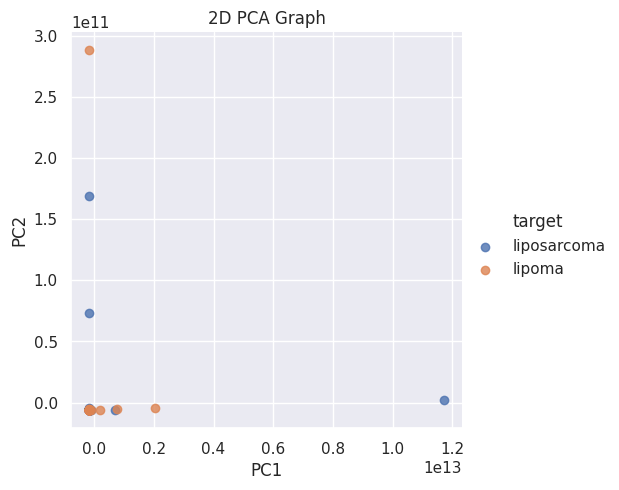

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import datasets
import seaborn as sns
import numpy as np

# Hyperparameters to tune:
numb_components = 70     # number of components

# Reduce from 4 to 3 features with PCA
pca = PCA(n_components=numb_components)

# Fit and transform data
pca_features = pca.fit_transform(X_train)

# Create a DataFrame from pca_features with column names 'PC1' and 'PC2'
pca_df = pd.DataFrame(data=pca_features[:, :2], columns=['PC1', 'PC2'])

pca_df = pca_df.rename(index=dict(zip(pca_df.index, y_train.index)))

# Add the labels from y_train to the DataFrame
pca_df['target'] = y_train

print(pca_df.head())

# Define target names mapping
target_names = {
    'lipoma': 'lipoma',
    'liposarcoma': 'liposarcoma'
}

# Map target names to the 'target' column in pca_df
pca_df['target'] = pca_df['target'].map(target_names)

# Set seaborn style
sns.set()

# Plot the PCA graph
sns.lmplot(
    x='PC1',
    y='PC2',
    data=pca_df,
    hue='target',
    fit_reg=False,  # Disable regression line
    legend=True
)

# Set plot title
plt.title('2D PCA Graph')

# Show the plot
plt.show()

## Choosing the right classifier

**Explanation of what is happening**


In [ ]:
#import pandas as pd
#from worclipo.load_data import load_data
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.ensemble import HistGradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
#import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split
from sklearn import datasets
#from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif
from statsmodels.sandbox.stats.multicomp import multipletests

#Feature Selection

In [29]:

# ---------------------FEATURE SELECTION -----------------------------------------------
# HYPERPARAMETER = aantal features om te selecteren

N1 = 6;
N2 = 10;
N3 = 50;

# Encode target variable
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# -------  ANOVA

# Compute F-statistics and p-values using f_classif
F_values, p_values = f_classif(X_train, y_train_encoded)

# Bonferroni correction on the p-values to correct for multiple testing
_, p_adjusted, _, alpha_corrected = multipletests(p_values, method='bonferroni')

# Create a DataFrame with feature names, F-values, and p-values
feature_stats_df = pd.DataFrame({'F-value': F_values, 'p-value': p_adjusted}, index=X_train.columns)

# Sort features based on absolute correlation values and select top 20
sorted_features_1 = feature_stats_df.abs().nlargest(N1, 'F-value')
sorted_features_2 = feature_stats_df.abs().nlargest(N2, 'F-value')
sorted_features_3 = feature_stats_df.abs().nlargest(N3, 'F-value')

# Maak nieuwe kleinere datasets met minder features
X_train_sel_1 = X_train.loc[:, sorted_features_1.index]
X_train_sel_2 = X_train.loc[:, sorted_features_2.index]
X_train_sel_3 = X_train.loc[:, sorted_features_3.index]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Train classifiers

In [30]:
# ---------------------CLASSIFIERS -------------------------------------------------------------
"""
classifiers = [
    (svm.SVC(kernel='linear', C=1.0, random_state=42), "LinSVM"),
    (svm.SVC(kernel="rbf", gamma=0.7, C=1.0), "rbfSVM"),
    (svm.SVC(kernel="poly", degree=2, gamma="auto", C=1.0), "polySVM"),
    (HistGradientBoostingClassifier(max_iter=100), "GBDT"),
    (KNeighborsClassifier(n_neighbors=5), "KNN"),
    (ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0), "RF"),
    (BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5), "Bagging meta-estimator"),
    (LogisticRegression(random_state=1), "LR"),
    (GaussianNB(), "NB")
]"""

classifiers = [
    (svm.SVC(kernel='linear', C=1.0, random_state=42), "LinSVM"),
    (KNeighborsClassifier(n_neighbors=5), "KNN"),
    (ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0), "RF")]

results = {}
for clf, label in classifiers:
    # Scores berekenen voor N1 aantal features
    scores_N1 = cross_val_score(clf, X_train_sel_1, y_train_encoded, cv=5)
    mean_accuracy_N1 = scores_N1.mean()
    std_dev_N1 = scores_N1.std()

    # Scores berekenen voor N2 aantal features
    scores_N2 = cross_val_score(clf, X_train_sel_2, y_train_encoded, cv=5)
    mean_accuracy_N2 = scores_N2.mean()
    std_dev_N2 = scores_N2.std()

    # Scores berekenen voor N3 aantal features
    scores_N3 = cross_val_score(clf, X_train_sel_3, y_train_encoded, cv=5)
    mean_accuracy_N3 = scores_N3.mean()
    std_dev_N3 = scores_N3.std()

    # Opslaan van resultaten
    results[label + f' ({N1} features)'] = (mean_accuracy_N1, std_dev_N1)
    results[label + f' ({N2} features)'] = (mean_accuracy_N2, std_dev_N2)
    results[label + f' ({N3} features)'] = (mean_accuracy_N3, std_dev_N3)

**Visualization of the performance of the different classifiers**

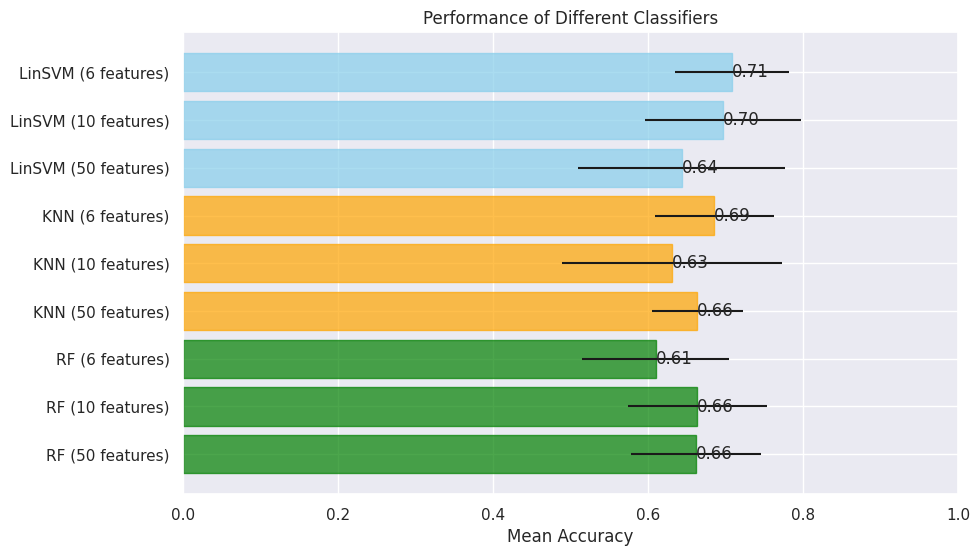

In [31]:
# Plot resultaten
labels = list(results.keys())
mean_accuracies = [result[0] for result in results.values()]
std_devs = [result[1] for result in results.values()]
colors = ['skyblue', 'skyblue', 'skyblue', 'orange', 'orange', 'orange', 'green', 'green', 'green', 'pink', 'pink', 'pink']

plt.figure(figsize=(10, 6))
bars = plt.barh(labels, mean_accuracies, xerr=std_devs, edgecolor='black', alpha=0.7)

# Loop door elke balk en pas de kleur aan op basis van de index van de classifier in de lijst
for i, bar in enumerate(bars):
    bar.set_color(colors[i % len(colors)])  # Gebruik modulo om ervoor te zorgen dat kleuren worden hergebruikt indien nodig
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{mean_accuracies[i]:.2f}', va='center')

plt.xlabel('Mean Accuracy')
plt.title('Performance of Different Classifiers')
plt.xlim(0, 1)
plt.gca().invert_yaxis()
plt.show()

## Optimalization of the GBDT classifier

**Explanation of code**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Define parameter grid for GBDT
param_distributions_gbdt = {
    'n_estimators': np.arange(50, 401, 50),
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Define parameter grid for LinSVM
param_distributions_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear']
}

# Define parameter grid for LR
param_distributions_lr = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [500, 1000, 1500]
}

# Perform optimization and training for PCA_80
classifiers = [(GradientBoostingClassifier(), param_distributions_gbdt, 'GBDT'),
               (SVC(), param_distributions_svm, 'LinSVM'),
               (LogisticRegression(), param_distributions_lr, 'LR')]

for clf, param_dist, label in classifiers:
    randomized_search = RandomizedSearchCV(clf, param_dist, cv=5, n_iter=20, random_state=42)
    randomized_search.fit(X_train_PCA80, y_train)
    print(f"Best Parameters for {label} (PCA_80):", randomized_search.best_params_)

# Perform optimization and training for PCA_90
for clf, param_dist, label in classifiers:
    randomized_search = RandomizedSearchCV(clf, param_dist, cv=5, n_iter=20, random_state=42)
    randomized_search.fit(X_train_PCA90, y_train)
    print(f"Best Parameters for {label} (PCA_90):", randomized_search.best_params_)




NameError: name 'np' is not defined

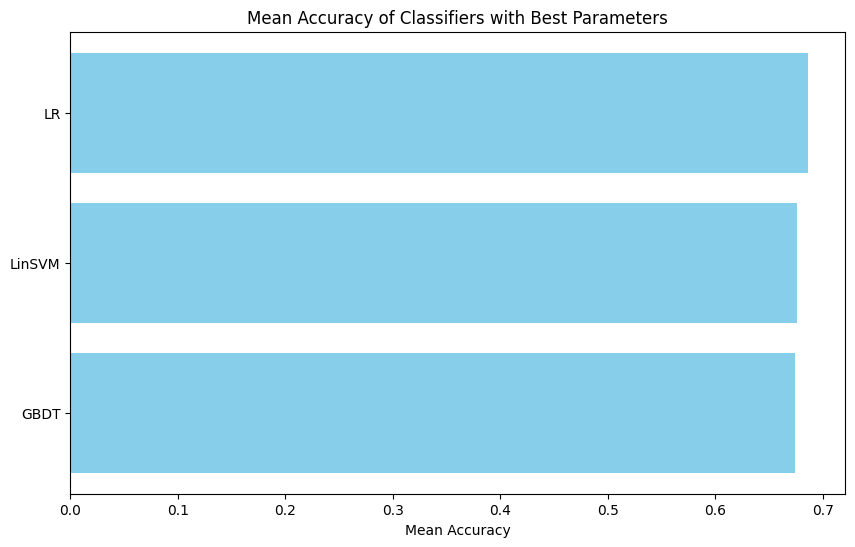

In [ ]:
import matplotlib.pyplot as plt

# Lijsten om beste parameters en mean accuracy op te slaan
best_params_list = []
mean_accuracy_list = []

# Grid search en training voor PCA_80
for clf, param_grid, label in classifiers:
    grid_search = GridSearchCV(clf, param_grid, cv=5)
    grid_search.fit(X_train_PCA80, y_train)
    best_params = grid_search.best_params_
    mean_accuracy = grid_search.best_score_
    best_params_list.append((label, best_params))
    mean_accuracy_list.append((label, mean_accuracy))

# Grid search en training voor PCA_90
for clf, param_grid, label in classifiers:
    grid_search = GridSearchCV(clf, param_grid, cv=5)
    grid_search.fit(X_train_PCA90, y_train)
    best_params = grid_search.best_params_
    mean_accuracy = grid_search.best_score_
    best_params_list.append((label, best_params))
    mean_accuracy_list.append((label, mean_accuracy))

# Sorteer mean accuracy van hoog naar laag
mean_accuracy_list.sort(key=lambda x: x[1], reverse=True)

# Plot mean accuracy voor elke classifier
plt.figure(figsize=(10, 6))
classifiers_labels = [clf_label for clf_label, _ in mean_accuracy_list]
mean_accuracies = [accuracy for _, accuracy in mean_accuracy_list]
plt.barh(classifiers_labels, mean_accuracies, color='skyblue')
plt.xlabel('Mean Accuracy')
plt.title('Mean Accuracy of Classifiers with Best Parameters')
plt.gca().invert_yaxis()  # Om de classifiers van hoog naar laag te tonen
plt.show()

## Visualization of the performance of the trained classifier

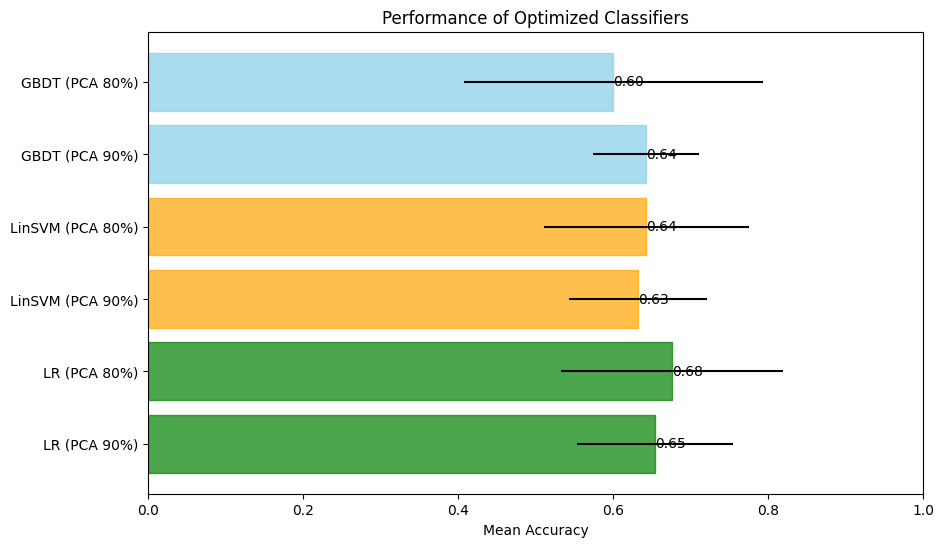

In [ ]:
import matplotlib.pyplot as plt

# Get the mean accuracies and standard deviations of the optimized classifiers
optimized_classifiers = ['GBDT (PCA 80%)', 'GBDT (PCA 90%)', 'LinSVM (PCA 80%)', 'LinSVM (PCA 90%)', 'LR (PCA 80%)', 'LR (PCA 90%)']
mean_accuracies = [results[classifier][0] for classifier in optimized_classifiers]
std_devs = [results[classifier][1] for classifier in optimized_classifiers]

# Define colors for the bars
colors = ['skyblue', 'skyblue', 'orange', 'orange', 'green', 'green']

# Plot the mean accuracies
plt.figure(figsize=(10, 6))
bars = plt.barh(optimized_classifiers, mean_accuracies, xerr=std_devs, edgecolor='black', alpha=0.7)

# Loop through each bar and set its color based on the index of the classifier in the list
for i, bar in enumerate(bars):
    bar.set_color(colors[i % len(colors)])  # Use modulo to ensure colors are reused if necessary
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{mean_accuracies[i]:.2f}', va='center')

plt.xlabel('Mean Accuracy')
plt.title('Performance of Optimized Classifiers')
plt.xlim(0, 1)
plt.gca().invert_yaxis()
plt.show()



In [ ]:
from sklearn.model_selection import learning_curve

# Definieer een functie om de leercurve te plotten
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=False)  # Verwijder `return_times=True` omdat we geen fit_times verwachten

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Trainingsvoorbeelden")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Trainingscore")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validatiescore")

    plt.legend(loc="best")
    return plt

# Plot leercurve voor elke classifier
for clf, params, label in classifiers:
    randomized_search = RandomizedSearchCV(clf, params, cv=5, n_iter=20, random_state=42)
    randomized_search.fit(X_train_PCA80, y_train)

    best_estimator = randomized_search.best_estimator_

    plot_learning_curve(best_estimator, f"Learning Curve ({label})", X_train_PCA80, y_train, cv=5)
    plt.show()



NameError: name 'RandomizedSearchCV' is not defined